# **Mô tả đồ án:**
Nhiệm vụ đồ án là phân tích dữ liệu chiến dịch tiếp thị của ngân hàng nhằm phân loại xem liệu khách hàng có đăng ký tài khoản tiền gửi có kỳ hạn hay không.<br />
Các bước thực hiện gồm: <br />
 - Tổng hợp dữ liệu
 - Làm sạch dữ liệu
 - EDA
 - Mã hoá dữ liệu
 - Lựa chọn đặt trưng quan trọng
 - Scale các đặt trưng
 - Xây dựng mô hình
 - Đánh giá mô hình



In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank-full.csv', sep = ';')

#**Tổng hợp dữ liệu**

In [ ]:
print(data.shape)
data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
for column in data.columns:
  print(column)
  print(data[column].value_counts())

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default
no     44396
yes      815
Name: default, dtype: int64
balance
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
housing
yes    25130
no     20081
Name: housing, dtype: int64
loan
no     3

#**Làm sạch dữ liệu**

In [ ]:
data.isnull().sum()*100/data.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

Ta có thể thấy, không có giá trị NA hay NAN trong tập dữ liệu. Tuy nhiên ở các biến job, education, contact, poutcome có giá trị Unknown và đặc biệt ở biến contact và poutcome biến Unknown chiếm tỉ lệ lớn.

#**EDA**

## **Phân tích từng biến**

###**Biến mục tiêu: y**

Chúng tôi bắt đầu phân tích khai phá dữ liệu với các biến bằng cách trực quan hóa từng đối tượng.

In [ ]:
data.y.describe()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

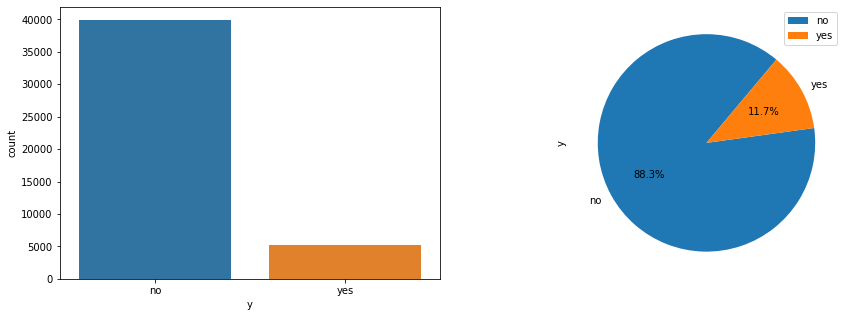

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(data['y'], ax = axs[0])

pie_y = pd.DataFrame(data['y'].value_counts())
pie_y.plot.pie( subplots=True,labels = pie_y.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, ax = axs[1])
# Unsquish the pie.
plt.gca().set_aspect('equal')

plt.show()

Ta có bộ dữ liệu với 11.7% là khách hàng sẽ mở tài khoản tiền gửi có kỳ hạn.


###**Những biến categorical:**

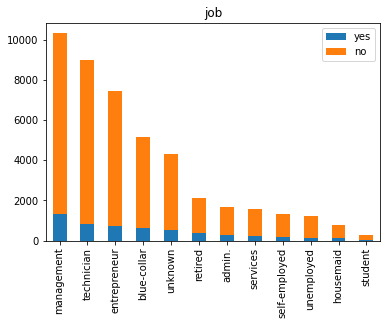

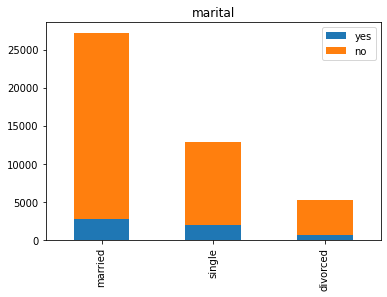

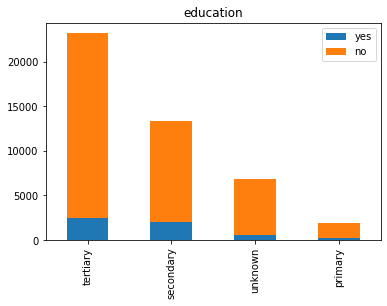

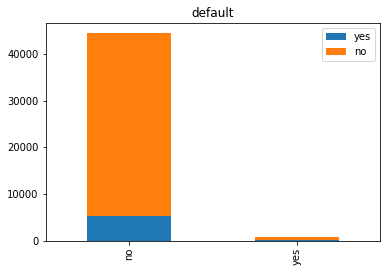

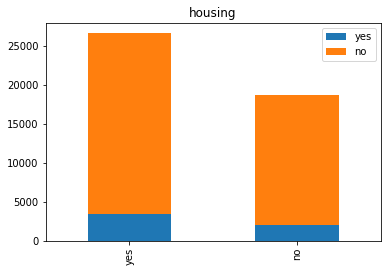

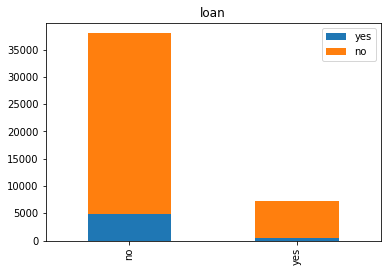

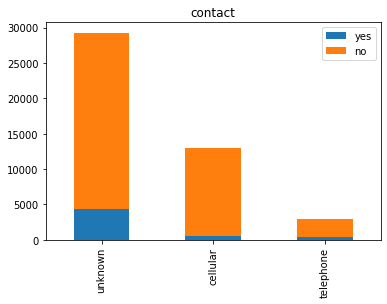

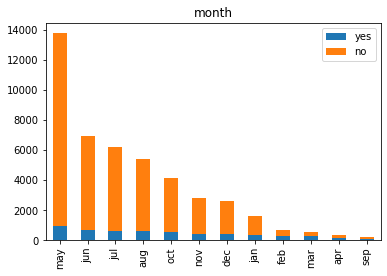

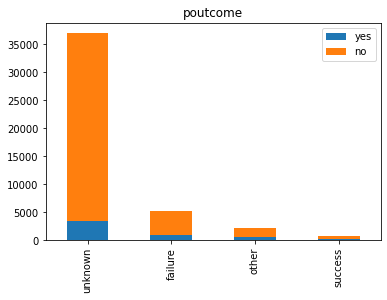

In [ ]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact','month', 'poutcome']
for col in categorcial_variables:
  col_yes = pd.DataFrame(data[data['y']=='yes'][col].value_counts())
  col_no = pd.DataFrame(data[data['y']=='no'][col].value_counts())
  plotdata = pd.DataFrame({'yes':col_yes.values.reshape(-1),'no':col_no.values.reshape(-1)}, index=data[col].unique())
  ax = plotdata.plot(kind='bar',stacked = True)
  plt.title(col)

Có nhiều giá trị chưa biết đối với nhiều biến trong tập dữ liệu. <br />
Các biến có giá trị không xác định hoặc có giá trị khác là: job, education, contact, poutcome. <br />
Ở biến contact và poutcome, giá trị 'Unknown' rất nhiều. Đây có thể là chủ ý của khách hàng khi họ không muốn cung cấp thông tin này, do đó, dữ liệu 'Unknow' cũng mang ý nghĩa cuả nó. Ta không thay thế mà xử lý trên các giá trị 'Unknown' này
Ta bắt đầu với việc tạo các giá trị mới cho các giá trị chưa biết trong job, education, contact và poutcome. Ta làm điều này để xem các giá trị có bị thiếu một cách ngẫu nhiên hoặc theo một mẫu nào đó.


In [11]:
## Creating new variables (variable name + '_un') to capture the information if the missing values are at random or is there
## a pattern in the missing values.
significant_cat_variables = ['education','job','housing','loan']
for var in significant_cat_variables:
    #df[var + '_un'] = 0
    #df[var + '_un'][df[var]=='unknown'] = 1
    #FIXME one-line coding
    data[var + '_un'] = (data[var] == 'unknown').astype(int)

Để suy ra các giá trị còn thiếu trong job và education, ta sử dụng bảng chéo giữa job và education. Giả thuyết của tôi ở đây là job bị ảnh hưởng bởi education. Do đó, chúng ta có thể sử dụng công việc để dự đoán nền giáo dục.

In [13]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [14]:
cross_tab(data,'job','education')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572,4219,171,209
blue-collar,149,5371,454,3758
entrepreneur,686,542,76,183
housemaid,173,395,45,627
management,7801,1121,242,294
retired,366,984,119,795
self-employed,833,577,39,130
services,202,3457,150,345
student,223,508,163,44


In [15]:
data['job'][data['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

**Suy ra học vấn từ việc làm:** Qua bảng tổng hợp, có thể thấy rằng những người làm công việc quản lý thường có trình độ đại học. Do đó, bất cứ nơi nào job là 'management' và education là 'unknown', chúng ta có thể thay thế education bằng 'tertiary' Tương tự, job là 'services' hay 'blue-collar' hay 'admin' thay education bằng 'secondary'. job là 'housemaid' thay education bằng 'primary'. <br />
**Suy ra công việc từ trình độ học vấn:** Nếu education là 'tertiary', thì job được thay bằng 'management'. Nếu education là 'secondary' thì job được thay bằng 'techniciant'. Nếu education là 'primary' thì job được thay bằng 'housemaid'.<br />
**Suy ra công việc theo tuổi:** Như chúng ta thấy, nếu 'tuổi'> 60, thì 'công việc' là 'nghỉ hưu'.

In [16]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'tertiary'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='blue-collar'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='admin'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'primary'
data.loc[(data['job'] == 'unknown') & (data['education']=='tertiary'), 'job'] = 'management'
data.loc[(data['job'] == 'unknown') & (data['education']=='secondary'), 'job'] = 'techniciant'
data.loc[(data['job'] == 'unknown') & (data['education']=='primary'), 'job'] = 'housemaid'

In [17]:
cross_tab(data,'job','education')

,tertiary,secondary,unknown,primary
admin.,572.0,4219.0,171.0,209.0
blue-collar,149.0,5825.0,0.0,3758.0
entrepreneur,686.0,542.0,76.0,183.0
housemaid,173.0,395.0,0.0,722.0
management,8077.0,1121.0,0.0,294.0
retired,371.0,989.0,130.0,796.0
self-employed,833.0,577.0,39.0,130.0
services,202.0,3607.0,0.0,345.0
student,223.0,508.0,163.0,44.0
technician,1968.0,5229.0,242.0,158.0


Ta có thể thấy, dữ liệu bị 'Unknown' đã giảm đáng kể.

###**Những biến numerical:**
Xem xét bảng summary của dữ liệu ở bên dưới để hiểu về những biến numerical.

In [18]:
numerical_variables = ['age','balance','day','contact','duration','campaign', 'pdays', 'previous']
data[numerical_variables].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


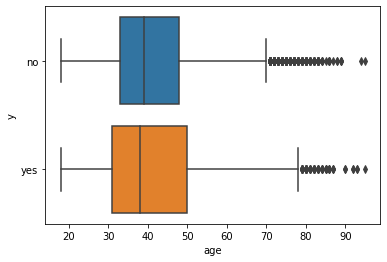

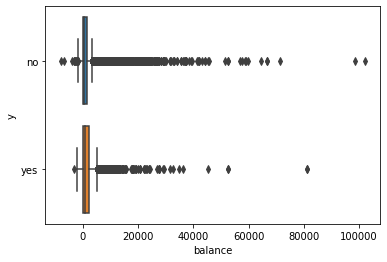

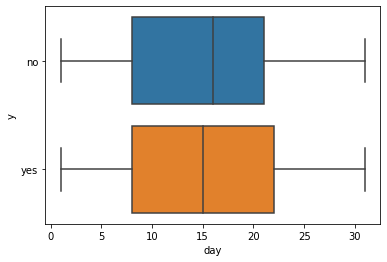

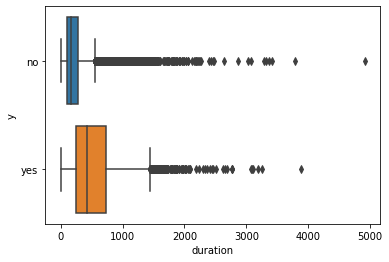

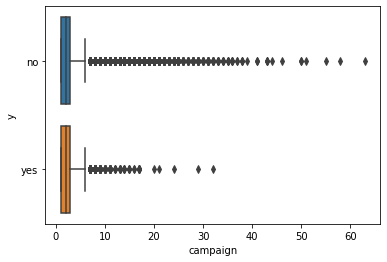

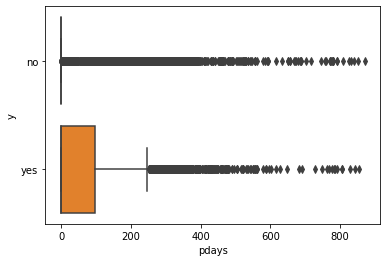

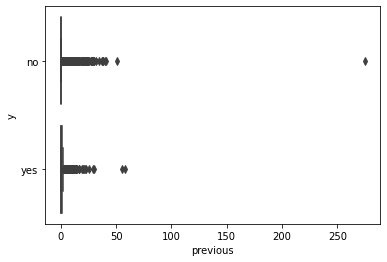

In [19]:
numerical_variables = ['age','balance','day','duration','campaign', 'pdays', 'previous']
for col in numerical_variables:
  sns.boxplot(x = col, y = 'y', data = data)
  plt.show()

**Missing value:** Không có <br />
**Outliers:** Outlier được định nghĩa là 1,5 x giá trị Q3 (phân vị thứ 75). Từ bảng trên, có thể thấy rằng chỉ có biến day không có outlier. Các biến còn lại đều có outlier. <br />
Với biến age giá trị lớn nhất là 95. Điều này có thể là giá trị thực tế, có phần hợp lý. Ta chấp nhận các outlier.<br />
Với biến balance, số dư trung bình năm của đối tượng khảo sát, với max > 100.000 Euro là hợp lý. Ta chấp nhận các outlier.<br />
Với biến duration, max > 5000. Biến được tính theo giây, tổng thời gian cuộc gọi khoảng 100 phút. Điều này cũng khá hợp lý. Ta chấp nhận các outlier. <br />
Với biến campaign, max > 60 hợp lý. Ta chấp nhận các outlier. <br />
Với biến pday, max > 800.  Tức số ngày trôi qua sau khi khách hàng được liên hệ lần cuối từ một chiến dịch trước đó ở khoảng hơn 2 năm. Điều này là hợp lý. Ta chấp nhận các outlier này.<br />
Với biến previous, max > 250, số lượng địa chỉ liên hệ được thực hiện trước chiến dịch này và cho khách hàng này lớn hơn 250. Điều này không hợp lý. Do phần lớn đối tượng khảo sát được liên hệ lần đầu nên đến phân vị thứ 75, vẫn bằng 0. Các giá trị outlier nằm tập trung và ở khoảng dưới 60 sẽ được chấp nhận. Gía trị 250 được thay thế bởi mean.


In [20]:
data.loc[data['previous']>250, 'previous'] = np.mean(data['previous'])

In [21]:
data[numerical_variables].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.574254
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,1.907906
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


# **Mã hoá dữ liệu**
Vì dữ liệu có nhiều biến categorical, nên cần các biến dummy mã hoá cho các biến đó.

###**Với các biến binary (Yes/No) thành (0,1)**

In [22]:
# List of variables to map

varlist =  ['default', 'housing', 'loan','y']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_un,job_un,housing_un,loan_un
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0.0,unknown,0,0,0,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0.0,unknown,0,0,0,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0.0,unknown,0,0,0,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,unknown,5,may,92,1,-1,0.0,unknown,0,1,0,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0.0,unknown,0,1,1,0,0


###**Với các biến categorical, tạo ra những biến dummy (one-hot-encoded)**

In [23]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['job', 'marital', 'education', 'contact','month', 'poutcome']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

In [ ]:
print(data.shape)
data.head()

(45211, 54)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_un,job_un,housing_un,loan_un,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_techniciant,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0.0,unknown,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0.0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0.0,unknown,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,blue-collar,married,secondary,0,1506,1,0,unknown,5,may,92,1,-1,0.0,unknown,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0.0,unknown,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#**Lựa chọn các đặt trưng quan trọng**

###**Một số chức năng trợ giúp để xây dựng và đánh giá các mô hình**

In [24]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')
    
def drawhist(df,feature):
    '''Draws an histogram for a feature in a data frame (df)'''
    plt.hist(df[feature])

def functionreplace(df,fea,val1,val2):
    '''Replaces value (val1) with value (val2) in the data frame (df) for a feature (fea)'''
    df[fea].replace(val1,val2)
    return df

def drawbarplot(df,x,y):
    '''Draws a bar plot for a given feature x and y in a data frame'''
    sns.barplot(x=x, y=y, data=df)

In [25]:
def getmeanauc(aucs,model):
    ''' Calculates the mean AUC for all the cross-validated samples and computes the value of C (Regularization Parameter) 
    for which max mean auc is obtained'''
    #Initialize empty array to hold mean AUC values.
    meanauc = []
    maxmean = 0 #Initial value for maximum mean AUC
    models_with_1_param = ['Logistic_Regression' , 'Ada_Boost']
    models_with_2_params = ['Decision_Tree' , 'Random_Forest', 'Grad_Boost']
    for c in aucs: #For loop to append AUC value to meanauc array.
        meanauc.append(np.mean(aucs[c]))
        if maxmean < np.mean(aucs[c]):
            maxmean = np.mean(aucs[c]) #Adjust value of maxmean
            cval = c
    if model in models_with_1_param:
        print("C value for max auc is: ",cval)
        print("Max Mean Auc corresponding to the optimal value of C = ", maxmean)
        return meanauc,cval
    if model in models_with_2_params:
        listSL=cval.split('L')
        splitval=int(listSL[0]) #Stores minimum split value for max AUC
        leafval=int(listSL[1]) #Stores minimum leaf value for max AUC
        print("min_sample_split value for max auc is:",splitval)
        print("min_sample_leaf value for max auc is:",leafval)
        print("Max mean AUC corresponding to optimal leaf and split value = ",maxmean)
        return meanauc,splitval,leafval

def plot_mean_auc_LR(aucs,cs, label):
    '''Plots different values of mean auc versus the hyperparameter C'''
    plt.plot(np.log10(cs),aucs, label = label )
    plt.xlabel("C (Regularization Parameter)")
    plt.ylabel("Mean AUC")
    plt.legend()
        
def plotfeatureimportances(train, importance):
    '''Plots feature importance in a sorted order and shows the most significant variables at the top'''
    X = list(train.columns)
    X.remove('y_yes')
    feature_importance_df = pd.DataFrame(data = importance, index = X, columns=['coefficient_values'])
    feature_importance_df['sort'] = feature_importance_df.coefficient_values.abs()
    sorted_feature_imp_df = feature_importance_df.sort_values(by='sort', ascending=False).drop('sort', axis=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 15)
    sns.barplot(np.array(sorted_feature_imp_df.coefficient_values), np.array(sorted_feature_imp_df.index.values))
    plt.title('Feature Importances')
    plt.xlabel('Coefficients')
    plt.ylabel('Feature Names')
    
def plotfeatureimp(fl,col):
    '''Plots the feature importance of all the independent variables in the model'''
    f=plt.figure(figsize=(10,15))
    plt.barh(range(len(fl)),fl)
    plt.yticks(range(len(col[:-1])),col[:-1])
    
def plotAUCDTRF(aucs,leafs,splits):
    '''Plots AUC for each value of Leaf and Split combination'''
    for i in range(len(splits)):
        plt.plot(leafs,aucs[len(leafs)*i:len(leafs)*i+len(leafs)], label = 'Split value= ' + str(splits[i]))
    plt.legend()
    plt.xlabel('Leaf Values')
    plt.ylabel('Mean AUC')
    
def plot_mean_auc_Ada_Boost(aucs, estimators, label):
    '''Plots different values of mean auc versus the Estimators for AdaBoosting'''
    plt.plot(estimators,aucs, label = label )
    plt.xlabel("Estimators")
    plt.ylabel("Mean AUC")
    plt.legend()
        

In [26]:
features_dropped = ['education_un', 'job_un', 'housing_un', 'loan_un','job', 'marital', 'education', 'contact','month', 'poutcome']
data_clean = data.drop(features_dropped, axis = 1)

In [ ]:
print(data_clean.shape)
data_clean.head()

(45211, 44)


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_techniciant,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


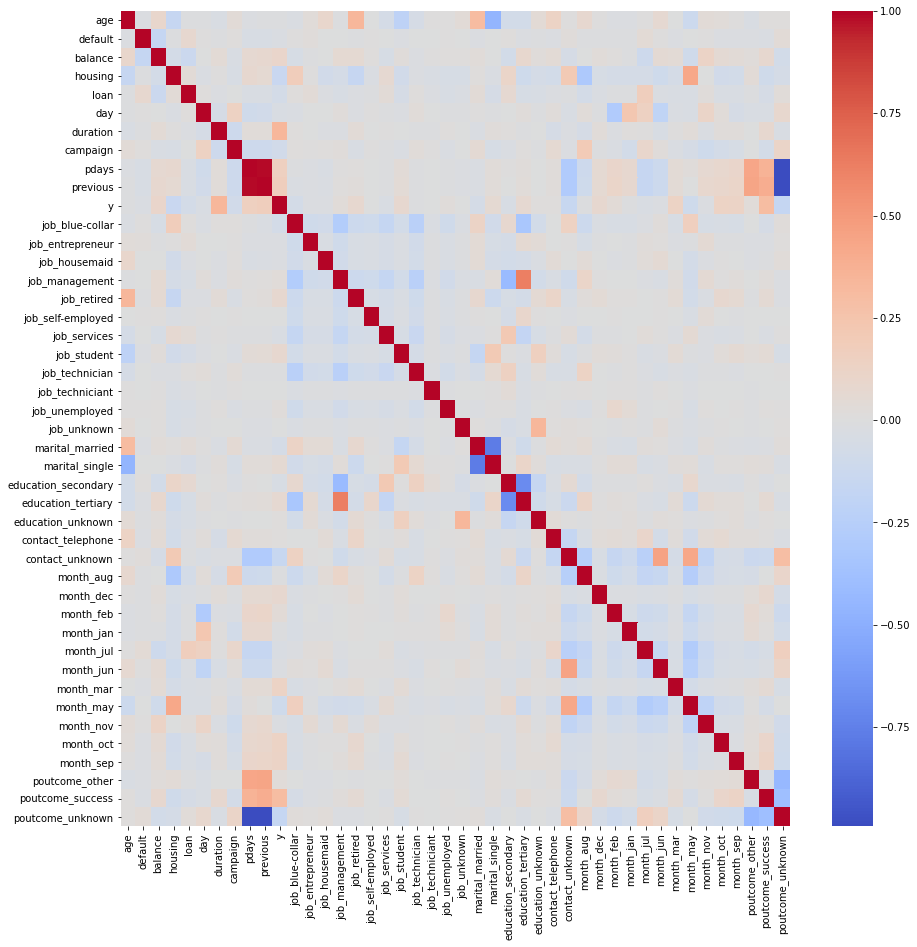

In [ ]:
drawheatmap(data_clean)

Từ bản đồ nhiệt ở trên, chúng ta có thể thấy rằng biến mục tiêu y có mối tương quan tốt với 'duration, poutcom_success, pdays, previous, month_mar, month_oct, month_sep, balance. Ta kỳ vọng rằng các biến độc lập này có ý nghĩa trong khi xây dựng mô hình.

# **Xây dựng và đánh giá mô hình**

**Chia tập Train - Test**: Trước tiên, chúng tôi bắt đầu với việc chia nhỏ dữ liệu thành các tập train và test. Đối với tất cả các mô hình, xác thực chéo 27 lần sẽ được sử dụng.
Đã sử dụng phân tầng (giữ nguyên phân phối mục tiêu) vì tập dữ liệu rất mất cân bằng. Việc phân chia train / test ngẫu nhiên có thể sẽ thay đổi phân test của biến mục tiêu khá nhiều.

In [27]:
# spliting training and testing data

X = data_clean.drop(['y'],axis=1).astype(np.float)
y = data_clean['y'].astype(np.float)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
train, test = train_test_split(data_clean, train_size=0.8, stratify=data_clean.y.values, random_state=5)

##**Scale các đặt trưng**

In [31]:
# data normalization with sklearn
# copy of datasets
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

# numerical features
num_cols = ['age','balance','day','duration','campaign', 'pdays', 'previous']
# apply standardization on numerical features
for i in num_cols:
    # fit scaler on training data
    norm = MinMaxScaler().fit(X_train_norm[[i]])
    # transform the training data column
    X_train_norm[i] = norm.transform(X_train_norm[[i]])
    # transform the testing data column
    X_test_norm[i] = norm.transform(X_test_norm[[i]]) 

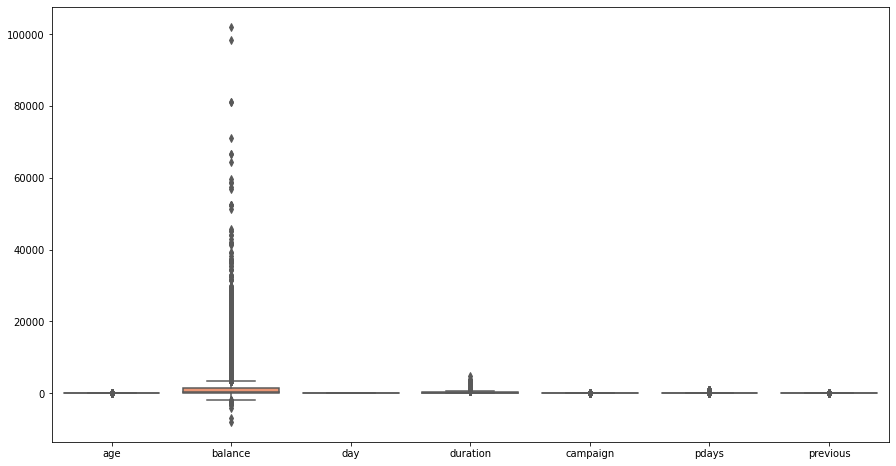

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=data[num_cols], orient="v", palette="Set2")

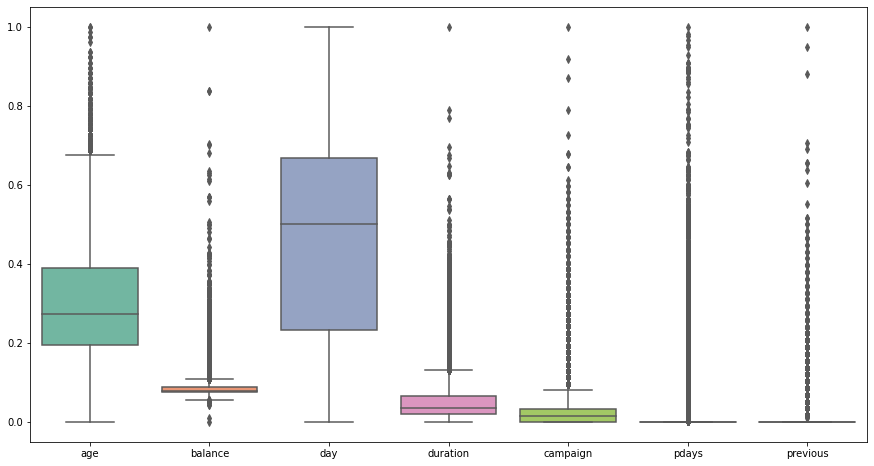

In [33]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=X_train_norm[num_cols].astype(np.float), orient="v", palette="Set2")

## **Mô hình hồi quy Logistic**
Ở đây, chúng tôi xây dựng mô hình hồi quy logistic và đánh giá nó bằng cách sử dụng đường cong ROC và các giá trị AUC. Vì dữ liệu có các đặt trưng với positive và negative bị mất cân bằng rất nhiều, đường cong ROC và các giá trị AUC là các thước đo đánh giá thích hợp so với độ chính xác. Đối với tất cả các mô hình trong tương lai, đường cong ROC và giá trị AUC được sử dụng làm thước đo đánh giá.

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
def LRmodel(train , validate , c, l_1 = False):
    '''Fits the Logistic Regression Model on the training data set and calculates evaluation metrics on the validation set
    with the regularization constant C'''
    X=list(train.columns) #Create list of column labels from training data
    Y='y_yes'
    X.remove('y_yes')
    scaler = StandardScaler().fit(train[X]) #Standardize features by removing the mean and scaling to unit variance
    train_std = scaler.transform(train[X]) #Compute the mean and standard deviation on training set
    validate_std = scaler.transform(validate[X])
    xtrain = train_std
    ytrain = train[Y]
    xval = validate_std
    yval = validate[Y]
    if l_1:
        logreg = LogisticRegression(C = c, penalty= 'l1', tol=0.01, solver='saga') #Apply logistic regression on L1 penalty
    else:
        logreg = LogisticRegression(C=c, penalty='l2', tol=0.01, solver='saga')
    logreg.fit(xtrain,ytrain)
    pred_proba_val = logreg.predict_proba(xval)[:,1]
    auc = metrics.roc_auc_score(yval, pred_proba_val)
    fpr, tpr, threshold = metrics.roc_curve(yval, pred_proba_val)
    accuracy = metrics.accuracy_score(yval, logreg.predict(xval))
    return auc,logreg.coef_, tpr, fpr, threshold, accuracy

## **Cross-Validation và Điều chỉnh các siêu tham số cho Hồi quy Logistic**
Việc điều chỉnh các mô hình được thực hiện một cách mô phỏng với Cross-Validation. Điều chỉnh về cơ bản được thực hiện để quyết định tham số chính quy tối ưu cho hồi quy logistic và SVM tuyến tính.

In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import preprocessing

def kfoldlr(dataset , k , cs, l1_penalty = False):
    '''Performs kfold cross validation for the dataset and also searches for the optimal regularixation parameter '''
    aucs = {}
    kf = KFold(k,shuffle=False) #Provides indices to split data in train/test sets
    for train_idx, vali_idx in kf.split(dataset): #For loop to extract and append AUC values to array from training data
        cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
        for c in cs:
            auc, f_imp, tpr, fpr, threshold, accuracy = LRmodel(cv_train,cv_validate,c, l_1 = l1_penalty)
            if c in aucs:
                aucs[c].append(auc)
            else:
                aucs[c]=[]
                aucs[c].append(auc)
    return aucs

In [ ]:
cs = np.logspace(-4,5,10)
aucs_l2=kfoldlr(train , 5 , cs)
aucs_l1=kfoldlr(train , 5 , cs, l1_penalty= True)

Các giá trị có thể có của C (tham số chính quy) được lấy từ 10 ^ −4 đến 10 ^ 5.

In [ ]:
means_l2,cval_l2 = getmeanauc(aucs_l2,'Logistic_Regression')
means_l1,cval_l1 = getmeanauc(aucs_l1,'Logistic_Regression')

C value for max auc is:  0.01
Max Mean Auc corresponding to the optimal value of C =  0.907303116528426
C value for max auc is:  0.01
Max Mean Auc corresponding to the optimal value of C =  0.9082031569755225


Hồi quy Logistic đang hoạt động tốt và từ lần chạy trên, hiển nhiên rằng LR đang hoạt động tốt hơn với tham số chính quy L1 so với L2.

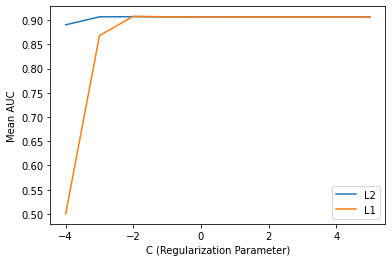

In [ ]:
plot_mean_auc_LR(means_l2,cs, label = 'L2')
plot_mean_auc_LR(means_l1,cs, label = 'L1')

##**Mô hình Cây quyết định**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
def DTmodel(train,validation,leaf=1,split=2):
    '''Decision Tree model to fit the train set to decision tree and predict AUC on test/validation set'''
    X=list(train.columns) #Create list of column labels from training data
    Y='y_yes'
    X.remove('y_yes')
    xtrain=train[X] 
    ytrain=train[Y]
    xval=validation[X]
    yval=validation[Y]
    
    #Runs sklearn's decision tree algorithm on the training data with min leaf size 1 and split size 2
    dt=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=leaf,min_samples_split=split) 
    
    #Train the model
    dt.fit(xtrain,ytrain)
    predict_proba_val=dt.predict_proba(xval)[:,1] #Predict class probabilities of input validation data
    auc=metrics.roc_auc_score(yval,predict_proba_val) #Compute ROC AUC from prediction scores
    fpr,tpr,threshold=metrics.roc_curve(yval,predict_proba_val) #Compute ROC
    accuracy=metrics.accuracy_score(yval,dt.predict(xval)) #Compute subset accuracy classification score
    
    #Feature importances. The higher the score, the more important the feature. 
    #Computed as the normalized total reduction of the criterion brought by that feature.
    imp=dt.feature_importances_ 
    return auc,imp,tpr,fpr,threshold,accuracy

##**Cross Validation and điều chỉnh siêu tham số cho cây quyết định**

In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import preprocessing

def kfoldDTRF(dataset, k,split,leaf,model):
    '''K-fold validation function for Decision tree and Random Forest. K=5, hence input data set is divided 
    into 5 datasets out of which 4 of them will be used to fit model and one to validate the model in each iteration '''
    aucs={}
    kf=KFold(k,shuffle=False) #Provides indices to split data in train/test sets
    for train_idx, vali_idx in kf.split(dataset): 
        cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
        for sp in split:
            for lf in leaf:
                if model=='DT':
                    #Run decision tree function above based on user input
                    core,fimp,tpr,fpr,threshold,accuracy=DTmodel(cv_train,cv_validate,lf,sp)
                if model=='RF':
                    #Run random forest function below based on user input
                    core,fimp,tpr,fpr,threshold,accuracy=randomforrest(cv_train,cv_validate,lf,sp)
                
                if str(sp)+"L"+str(lf) in aucs:
                    aucs[str(sp)+"L"+str(lf)].append(core)
                else:
                    aucs[str(sp)+"L"+str(lf)]=[]
                    aucs[str(sp)+"L"+str(lf)].append(core)
    return aucs

min_sample_split_value và min_sample_leaf là siêu tham số cho Cây Quyết định và Random Forest cho biết kích thước chia nhỏ nhất và kích thước lá tối thiểu. Phạm vi giá trị được thực hiện cho phần tách là [10, 2000] và phạm vi cho phần lá là [5, 200]. Do đó, có 100 sự kết hợp của các giá trị chia và lá. Đối với mỗi kết hợp này, AUC được tính toán.

In [ ]:
split = np.geomspace(10,2000,num=10,dtype=int)
leaf = np.geomspace(5,200,num=10,dtype=int)
aucsdt=kfoldDTRF(train,5,split,leaf,'DT')

min_sample_split value for max auc is: 341
min_sample_leaf value for max auc is: 17
Max mean AUC corresponding to optimal leaf and split value =  0.9122967654100741


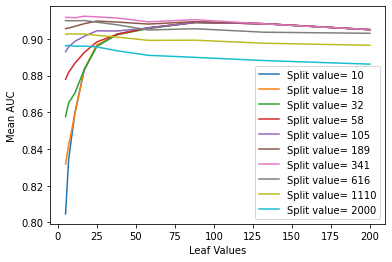

In [ ]:
meanauc,splitval,leafval=getmeanauc(aucsdt,'Decision_Tree')
plotAUCDTRF(meanauc,leaf,split)

Rõ ràng là Cây quyết định đang hoạt động tốt hơn một chút so với Hồi quy logistic.

##**Mô hình Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def randomforrest(train,validation,leaf=1,split=2):
    '''Random Forest model to fit the training set to random forest and compute AUC on test/validation set'''
    X=list(train.columns) #Provides indices to split data in train/test sets
    Y='y_yes'
    X.remove('y_yes')
    xtrain=train[X]
    ytrain=train[Y]
    xval=validation[X]
    yval=validation[Y]
    
    #Run sklearn's random forest algorithm with 128 trees and a minimum split size of 2 and minimum leaf size 1
    random_forest = RandomForestClassifier(n_estimators=128,min_samples_split=split,min_samples_leaf=leaf)
    
    #Train the model
    random_forest.fit(xtrain,ytrain)
    
    #Predict target values
    Y_pred = random_forest.predict(xval)
    
    #Predict class probabilities of input validation data
    proba_val=random_forest.predict_proba(xval)[:,1]
    
    #Compute ROC
    fpr, tpr, thresholds=metrics.roc_curve(yval,proba_val)
    
    #Compute ROC AUC scores from prediction values
    score=metrics.roc_auc_score(yval,proba_val)
    
    #Feature importances. The higher the score, the more important the feature. 
    #Computed as the normalized total reduction of the criterion brought by that feature.
    importance=random_forest.feature_importances_
    accuracy=metrics.accuracy_score(yval,random_forest.predict(xval))
    return score,importance,tpr,fpr,thresholds,accuracy

##**Cross Validation và điều chỉnh siêu tham số cho Random Forest**
min_sample_split_value và min_sample_leaf là siêu tham số cho rừng ngẫu nhiên cho biết kích thước chia nhỏ nhất và kích thước lá tối thiểu. Phạm vi giá trị được lấy để tách là [10,2000] và phạm vi cho lá là [5,200]. Do đó, có 100 sự kết hợp của các giá trị chia và lá. Đối với mỗi kết hợp này, AUC được tính toán.

In [ ]:
RF_split = np.geomspace(10,2000,num=10,dtype=int)
RF_leaf = np.geomspace(5,200,num=10,dtype=int)

RF_auc=kfoldDTRF(train,5,RF_split,RF_leaf,'RF')

min_sample_split value for max auc is: 10
min_sample_leaf value for max auc is: 5
Max mean AUC corresponding to optimal leaf and split value =  0.9294690047739664


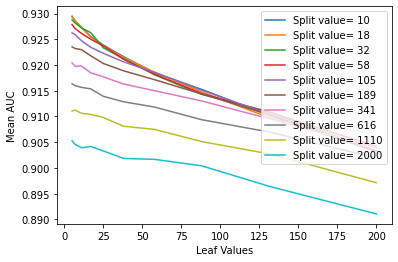

In [ ]:
RF_aucs,RF_splitval,RF_leafval=getmeanauc(RF_auc,'Random_Forest')
plotAUCDTRF(RF_aucs,RF_leaf,RF_split)

Ta thấy là Random Forest đang hoạt động tốt hơn cả hai mô hình Hồi quy logistic và Cây quyết định.

Từ đây, ta sử dụng mô hình Random Forest để tính toán đưa ra những quyết định cho chiến dịch về đăng ký tài khoản tiền gửi có kỳ hạn của ngân hàng
.
